In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.base import ClusterMixin
from sklearn.base import BaseEstimator
from random import *
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist

In [16]:
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
race = pd.read_csv("../../../output/data_clean/cleaned_race_equivalent_distance.csv", index_col= 0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)
race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1206
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   race_year_id          1133 non-null   int64  
 1   event                 1133 non-null   object 
 2   race                  1133 non-null   object 
 3   country               1133 non-null   object 
 4   participation         1133 non-null   object 
 5   distance              1133 non-null   float64
 6   elevation_gain        1133 non-null   float64
 7   elevation_loss        1133 non-null   float64
 8   aid_stations          1133 non-null   int64  
 9   participants          1133 non-null   int64  
 10  year                  1133 non-null   int64  
 11  month                 1133 non-null   int64  
 12  day                   1133 non-null   int64  
 13  frequency_in_ranking  1133 non-null   int64  
 14  equivalent_distance   1133 non-null   float64
 15  weighted_elevation   

In [17]:
join = pd.merge(runner, race, left_on="race_year_id", right_on="race_year_id", how="left")
join = join.loc[join.age_range != "Undefined"]
join = join.loc[join.speed < 20]
join = join.loc[join.distance > 150]

In [18]:
join_unique = join.drop_duplicates(subset=['runner_id'])

<AxesSubplot:xlabel='equivalent_distance', ylabel='Count'>

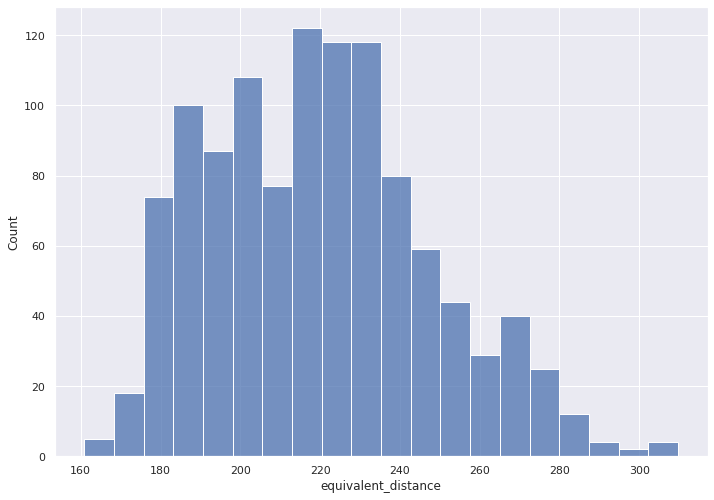

In [19]:
sns.histplot(
    x = race.equivalent_distance[race.distance > 150]
)

<AxesSubplot:xlabel='distance', ylabel='Count'>

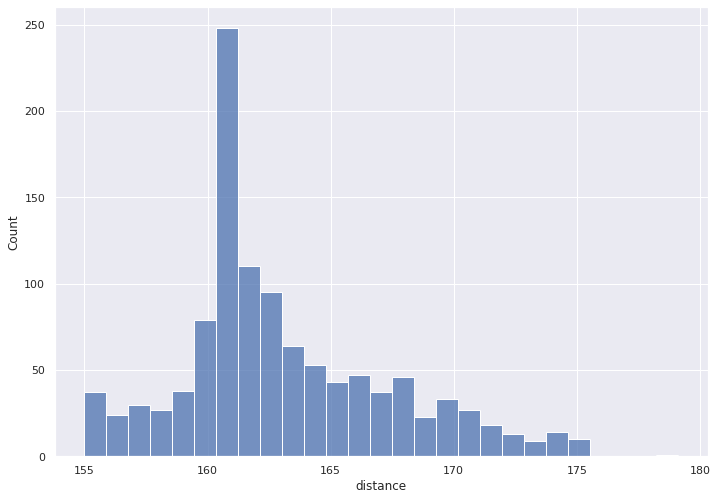

In [23]:
sns.histplot(
    x = race.distance[race.distance > 150]
)

<AxesSubplot:xlabel='weighted_elevation', ylabel='Count'>

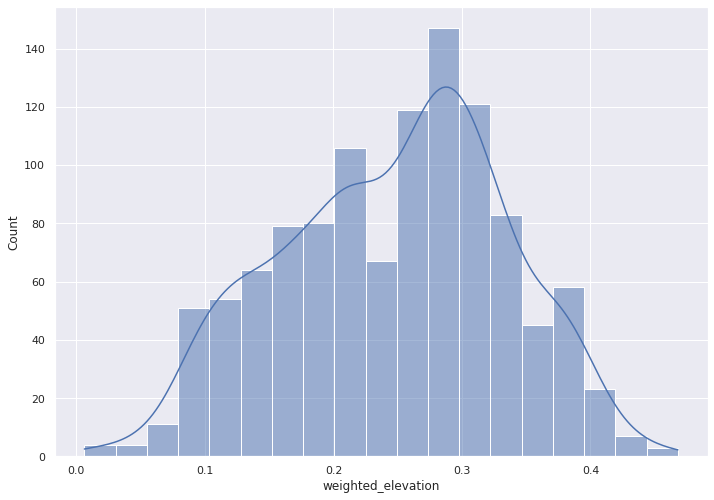

In [25]:
sns.histplot(
    x = race.weighted_elevation[race.distance > 150],
    kde = True
)

<AxesSubplot:xlabel='weighted_elevation', ylabel='equivalent_distance'>

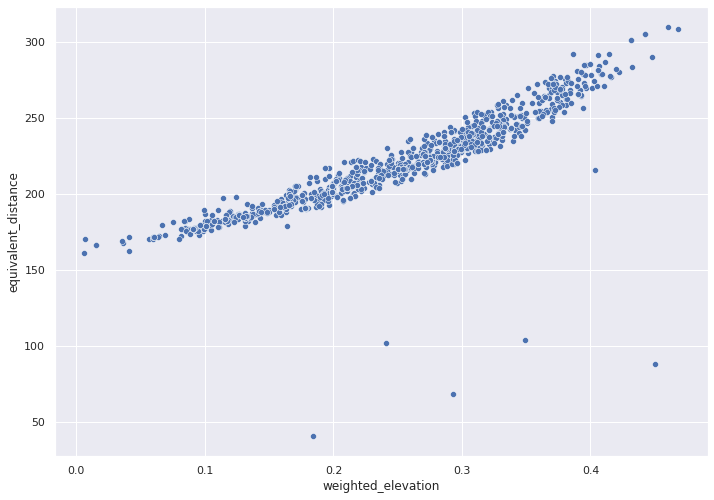

In [26]:
sns.scatterplot(
    x = "weighted_elevation",
    y = "equivalent_distance",
    data = race
    
)

<AxesSubplot:xlabel='distance', ylabel='equivalent_distance'>

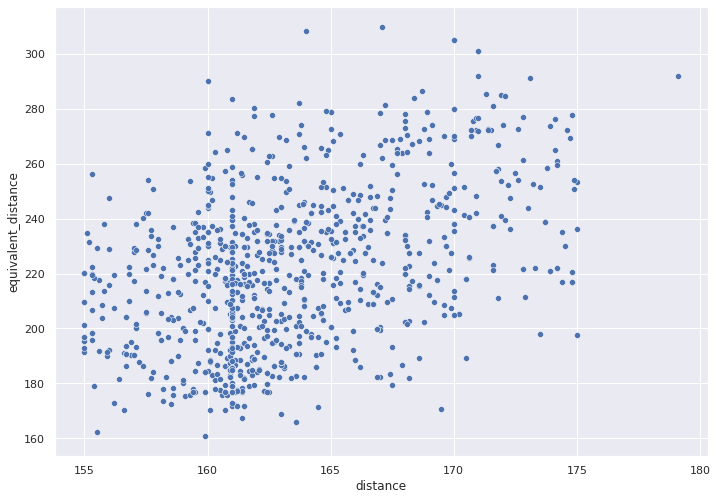

In [28]:
sns.scatterplot(
    x = "distance",
    y = "equivalent_distance",
    data = race[race.distance > 150]
    
)

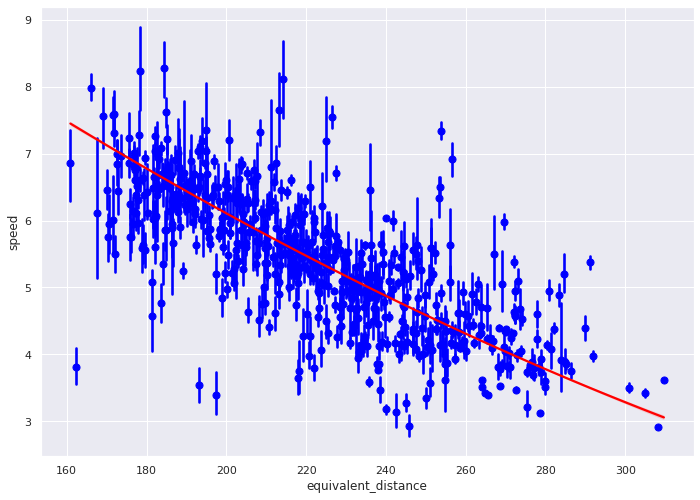

In [36]:
ax = sns.regplot(
    x = "equivalent_distance",
    y = "speed",
    data = join[join.distance > 150],
    scatter_kws={"color": "blue"}, line_kws={"color": "red"},
    x_estimator=np.mean,
    order = 2
)

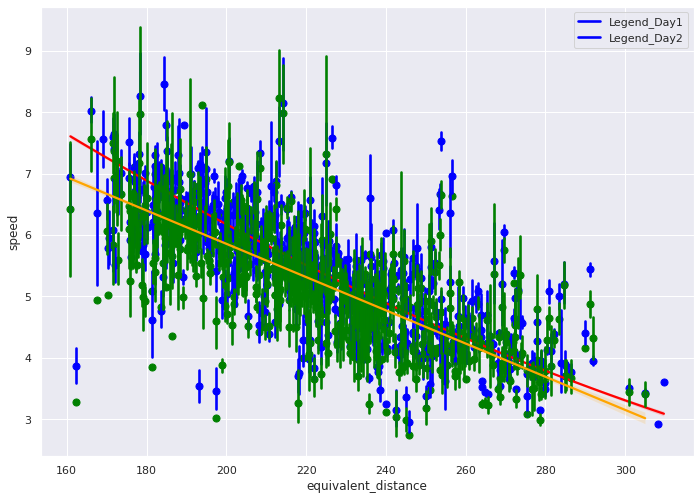

In [39]:
long_distances = join.loc[join.distance >= 150]
ax = sns.regplot(
    x = "equivalent_distance",
    y = "speed",
    data = long_distances[long_distances.gender == "M"],
    scatter_kws={"color": "blue"}, line_kws={"color": "red"},
    x_estimator=np.mean,
    order = 2
)

ax = sns.regplot(
    x = "equivalent_distance",
    y = "speed",
    data = long_distances[long_distances.gender == "W"],
    scatter_kws={"color": "green"}, line_kws={"color": "orange"},
    x_estimator=np.mean,
    order = 2
)

plt.legend(labels=["Legend_Day1","Legend_Day2"])

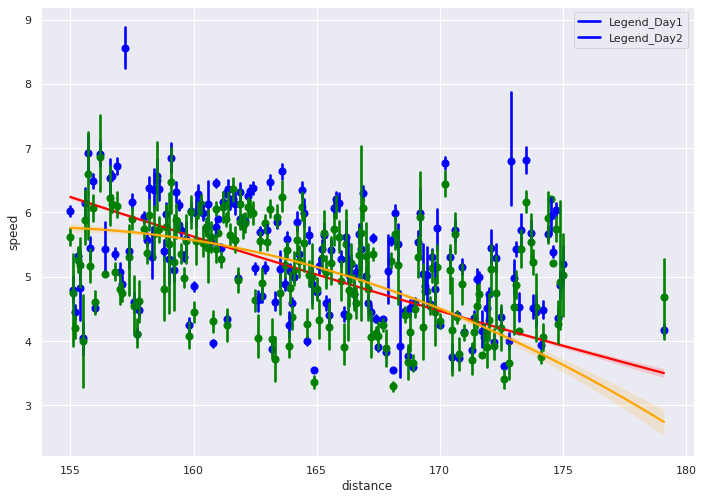

In [40]:
long_distances = join.loc[join.distance >= 150]
ax = sns.regplot(
    x = "distance",
    y = "speed",
    data = long_distances[long_distances.gender == "M"],
    scatter_kws={"color": "blue"}, line_kws={"color": "red"},
    x_estimator=np.mean,
    order = 2
)

ax = sns.regplot(
    x = "distance",
    y = "speed",
    data = long_distances[long_distances.gender == "W"],
    scatter_kws={"color": "green"}, line_kws={"color": "orange"},
    x_estimator=np.mean,
    order = 2
)

plt.legend(labels=["Legend_Day1","Legend_Day2"])

<AxesSubplot:>

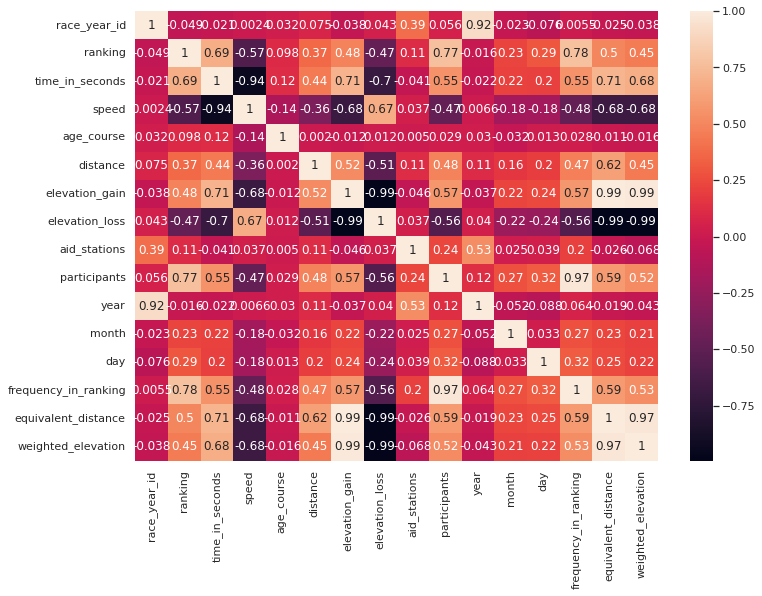

In [41]:
sns.heatmap(join.corr(), annot=True)